# Capítulo 14 - Diagnóstico de modelos

## Seção 14.2 - Resíduos

Resíduos são a diferença entre o cálculo do modelo e o valor real dos dados. A ideia é plotar os resíduos e ver se estão dispersos não aleatoriamente. Se surgir um padrão aparente, é necessário investigar para ver porque esse padrão surgiu, pois provavelmente o modelo pode ser melhorado.

Vamos ver isso em prática estudando dados de habitação. Primeiro vamos abrir a base de dados e ver o formato dos registros:

In [1]:
import pandas as pd

housing = pd.read_csv('../data/housing_renamed.csv')

print(housing.head())

  neighborhood            type  units  year_built   sq_ft    income  \
0    FINANCIAL  R9-CONDOMINIUM     42      1920.0   36500   1332615   
1    FINANCIAL  R4-CONDOMINIUM     78      1985.0  126420   6633257   
2    FINANCIAL  RR-CONDOMINIUM    500         NaN  554174  17310000   
3    FINANCIAL  R4-CONDOMINIUM    282      1930.0  249076  11776313   
4      TRIBECA  R4-CONDOMINIUM    239      1985.0  219495  10004582   

   income_per_sq_ft  expense  expense_per_sq_ft  net_income     value  \
0             36.51   342005               9.37      990610   7300000   
1             52.47  1762295              13.94     4870962  30690000   
2             31.24  3543000               6.39    13767000  90970000   
3             47.28  2784670              11.18     8991643  67556006   
4             45.58  2783197              12.68     7221385  54320996   

   value_per_sq_ft       boro  
0           200.00  Manhattan  
1           242.76  Manhattan  
2           164.15  Manhattan  
3     

Agora vamos testar um modelo de regressão linear múltipla do valor do pé quadrado em função de 3 variáveis:

In [2]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

house1 = smf.glm('value_per_sq_ft ~ units + sq_ft + boro', data=housing).fit()
print(house1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        value_per_sq_ft   No. Observations:                 2626
Model:                            GLM   Df Residuals:                     2619
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1879.5
Method:                          IRLS   Log-Likelihood:                -13621.
Date:                Mon, 09 May 2022   Deviance:                   4.9224e+06
Time:                        12:01:54   Pearson chi2:                 4.92e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7772
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.29

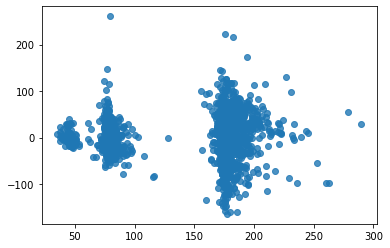

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = sns.regplot(x=house1.fittedvalues, y=house1.resid_deviance, fit_reg=False)
plt.show()

Observe que a plotagem de resíduos mostra alguns clusters óbvios. Vamos colorir os dados de acordo com a variável boro (bairros de NY) para observar que os clusters são altamente determinados pelo valor dessa variável:

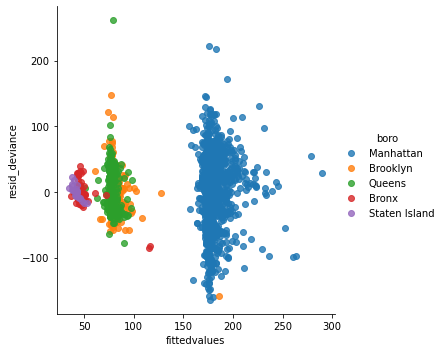

In [4]:
res_df = pd.DataFrame({
    'fittedvalues': house1.fittedvalues,
    'resid_deviance': house1.resid_deviance,
    'boro': housing['boro']
})

fig = sns.lmplot(x='fittedvalues', y='resid_deviance', data=res_df, hue='boro', fit_reg=False)
plt.show()

Podemos também plotar os resídos num gráfico q-q com uma distribuição de referência (por exemplo, uma distribuição normal) ou um histograma dos resíduos. Com isso podemos concluir que é necessário fazer alguma transformação nos dados para obter melhores resultados do modelo:

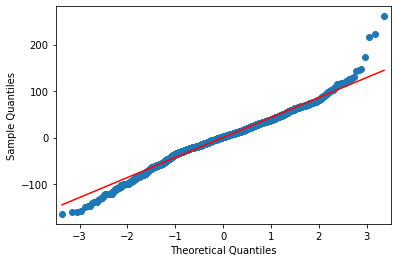

In [5]:
from scipy import stats

resid = house1.resid_deviance.copy()
resid_std = stats.zscore(resid)

fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

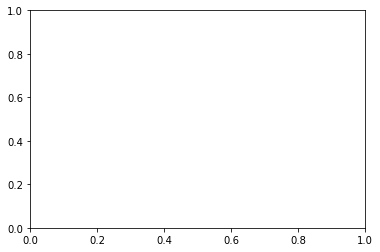

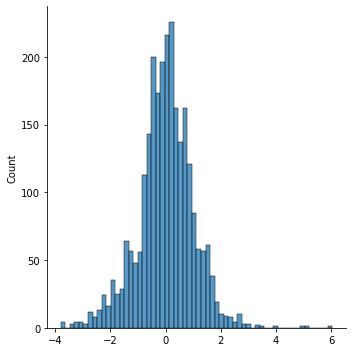

In [6]:
fit, ax = plt.subplots()
ax = sns.displot(resid_std)
plt.show()

## Seção 14.3 - Comparando vários modelos

Essa seção descreve rapidamente como usar o ANOVA e como calcular o desempenho por meio do AIC (Akaike Information Criterion) e do BIC (Bayesian Information Criterion). Entretanto, não estende na descrição desses métodos, então vou pular nesse caderno.

## Seção 14.4 - Validação cruzada k-fold

A ideia aqui é separar o conjunto de dados em treinamento/teste.